In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("Fake_Bills.csv", sep=';')

# Strip column names of any whitespace
df.columns = df.columns.str.strip()

# Convert 'is_genuine' to boolean (if stored as string)
df['is_genuine'] = df['is_genuine'].astype(str).str.strip().map({'True': 1, 'False': 0})

# Convert all other columns to numeric
df.iloc[:, 1:] = df.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')

# Handle missing values
df.fillna(df.median(), inplace=True)

In [9]:
# Step I: EDA
print("Dataset shape:", df.shape)
print("Dataset Info:\n", df.info())
print("\nMissing Values:\n", df.isnull().sum())
print("\nClass Distribution:\n", df['is_genuine'].value_counts())

Dataset shape: (1500, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   int64  
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1500 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 82.2 KB
Dataset Info:
 None

Missing Values:
 is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

Class Distribution:
 is_genuine
1    1000
0     500
Name: count, dtype: int64


In [11]:
# Summary statistics
print("\nSummary Statistics:\n", df.describe())


Summary Statistics:
         is_genuine     diagonal  height_left  height_right   margin_low  \
count  1500.000000  1500.000000  1500.000000   1500.000000  1500.000000   
mean      0.666667   171.958440   104.029533    103.920307     4.481627   
std       0.471562     0.305195     0.299462      0.325627     0.656137   
min       0.000000   171.040000   103.140000    102.820000     2.980000   
25%       0.000000   171.750000   103.820000    103.710000     4.030000   
50%       1.000000   171.960000   104.040000    103.920000     4.310000   
75%       1.000000   172.170000   104.230000    104.150000     4.860000   
max       1.000000   173.010000   104.880000    104.950000     6.900000   

         margin_up      length  
count  1500.000000  1500.00000  
mean      3.151473   112.67850  
std       0.231813     0.87273  
min       2.270000   109.49000  
25%       2.990000   112.03000  
50%       3.140000   112.96000  
75%       3.310000   113.34000  
max       3.910000   114.44000  


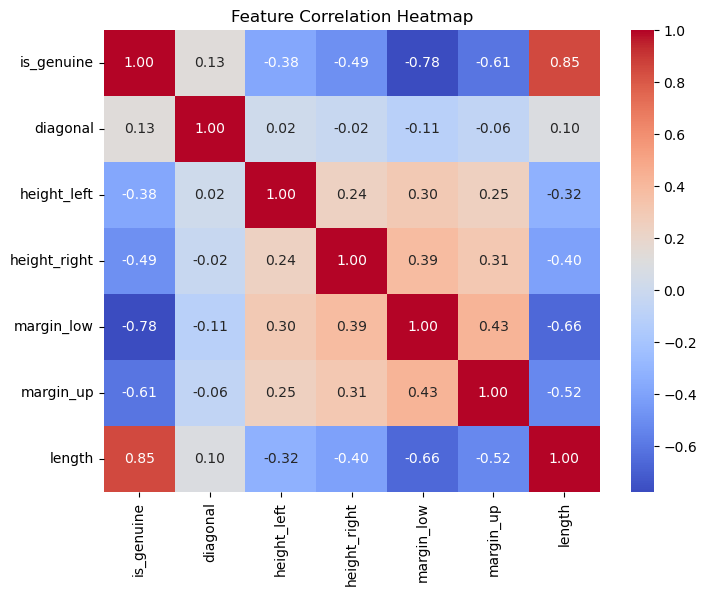

In [13]:
# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

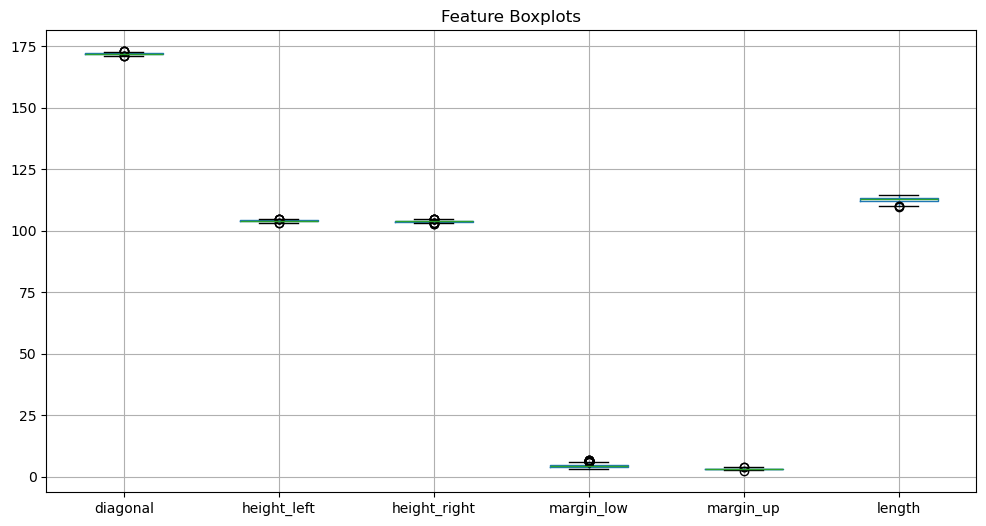

In [15]:
# Boxplots for outliers
plt.figure(figsize=(12,6))
df.drop(columns=['is_genuine']).boxplot()
plt.title("Feature Boxplots")
plt.show()


In [17]:
# Step II: Preprocessing
X = df.drop(columns=['is_genuine'])
y = df['is_genuine']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
# Step III: Linear Regression (Predicting length based on other features)
X_lr = df.drop(columns=['length'])
y_lr = df['length']
X_lr_train, X_lr_test, y_lr_train, y_lr_test = train_test_split(X_lr, y_lr, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_lr_train, y_lr_train)
y_lr_pred = lr_model.predict(X_lr_test)

print("\nLinear Regression Performance:")
print("MSE:", mean_squared_error(y_lr_test, y_lr_pred))
print("R² Score:", r2_score(y_lr_test, y_lr_pred))


Linear Regression Performance:
MSE: 0.22801739856698228
R² Score: 0.6805787136014367


In [25]:
# Step IV: Logistic Regression (Classifying real vs fake bills)
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)

print("\nLogistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Logistic Regression Performance:
Accuracy: 0.99
Confusion Matrix:
 [[108   2]
 [  1 189]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       110
           1       0.99      0.99      0.99       190

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



In [27]:
# Step V: Conclusion
print("\nConclusion:")
print("- Linear regression had an R² score of", round(r2_score(y_lr_test, y_lr_pred), 2))
print("- Logistic regression achieved an accuracy of", round(accuracy_score(y_test, y_pred) * 100, 2), "%")
print("- Logistic regression is effective for classification, while linear regression is more suited for predicting continuous values.")


Conclusion:
- Linear regression had an R² score of 0.68
- Logistic regression achieved an accuracy of 99.0 %
- Logistic regression is effective for classification, while linear regression is more suited for predicting continuous values.
